## Prepare data

In [ ]:
from google.colab import drive
drive.mount("/content/MyDrive")

Mounted at /content/MyDrive


In [ ]:
%cp '/content/MyDrive/MyDrive/Colab Notebooks/Fake news detection/Data/data_clean_4_class.pkl' '/content'

In [ ]:
import pandas as pd

data = pd.read_pickle('/content/data_clean_4_class.pkl')
# data = data[data['Label'] != 'Undetermined']
data

,Content,Label
0,bắt_cóc trục_xuất đừng chánh_trị_gia giàu hứa ...,False
1,dâm tặc viện phó đầu_sai vũ nhôm tràn_ngập báo...,False
2,kỷ hợi dung_dưỡng tự_chủ dân_tộc v việt_nam ch...,False
3,lật chiến thư chỉ_thị nguyễn thị kim_ngân cam_...,False
4,màu cờ linh_hồn tổ_quốc bảo giang tự_do nhân_p...,False
...,...,...
1294,kiên_giang miễn_nhiệm đại_biểu hđnd hà văn phú...,True-w-false
1295,việt_nam tặng lào món quà một_triệu usd mua ch...,True-w-false
1296,bốc_thăm tư_pháp xác_minh tài_sản thu_nhập tư_...,True-w-false
1297,thủ_tướng giorgia meloni đón trang_trọng chủ_t...,True-w-false


In [ ]:
data_shuffled = data.sample(frac=1, random_state=42).reset_index(drop=True)
data_shuffled

,Content,Label
0,phó chủ_tịch võ thị ánh xuântôi mong_đợi movit...,True
1,vận_động ngân_hàng thương_mại lãi_suất phó thố...,True
2,tài_liệu tố_giác nguyễn_chí vịnh giới_thiệu tà...,False
3,việt bầu lãnh_đạo bang oregon mỹ hiện hạ_nghị_...,True-w-false
4,thủ_tướng đề_cao vai_trò asean thế_giới đa cực...,True
...,...,...
1211,triển_khai loạt dự_án trọng_điểm địa_phương ỷ_...,True-w-false
1212,râu anh_hùng kế_hoạch phản_gián kế_hoạch kế_ho...,True-w-false
1213,lãnh_đạo quốc_gia tổ_chức quốc_tế chúc_mừng qu...,True-w-false
1214,bộ_chính_trị quyết_định miễn_nhiệm bộ_trưởng t...,False-w-true


In [ ]:
sentences = list(data_shuffled['Content'])
labels = list(data_shuffled['Label'])

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(sentences, labels, test_size=0.2, random_state=42, stratify=labels)

In [ ]:
X_train[0]

'đà_lạt đe_doạ xoá_sổ lịch_sử dốt_nát tận_cùng giới lãnh_đạo hình đà_lạt mẫu tiến_trình công_nghiệp_hoá đô_thị_hoá sapa mẫu thành_công gs trần hữu dũng trang_điểm phẫn_nộ bày_tỏ lãnh_đạo ngu_dốt lãnh_đạo lâm_đồng hề ngu_dốt khôn_ngoan lựa_chọn cty cổ_phần đại quang_minh doanh_nghiệp trấn_giữ khoản đất vàng thủ thiêm phát_sinh dân oan loạt lãnh_đạo hầu bắt_tay doanh_nghiệp quy_hoạch thủ thiêm tức_là đại quang_minh lãnh_đạo lâm_đồng lựa_chọn doanh_nghiệp cáo_già thừa_thãi kinh_nghiệm bất_động_sản ổn_định chính_sách dòng tiền dồi_dào lãnh_đạo lâm_đồng tài_tình quyết_tâm chính_trị lớn_lao chấp_nhận rách_nát rạp hoà_bình biểu_tượng giới lãnh_đạo tỉnh đường_sắt răng_cưa thuỵ_sĩ giá phế_liệu vẽ dự_án phục_hồi ngàn tỷ đồng giới tinh_hoa tỉnh lâm_đồng tinh_thần chỉ_đạo thủ_tướng tiểu paris châu_á rõ_ràng nông_cạn đề_án tiểu paris châu_á đơn_thuần điền chỗ trống gỡ cũ_kỹ mảnh đất vàng kế_hoạch lợi_nhuận doanh_nghiệp việt_nam lố_lăng rác_rưởi hà_nội cạnh hồ gươm hàm cá_mập kiến_trúc thời chắp_vá 

In [ ]:
y_train[0]

'False-w-true'

In [ ]:
def label_encoder(labels):
    label_mapping = {'True':0, 'False': 1, 'True-w-false':2, 'False-w-true':3}
    return np.array([label_mapping[label] for label in labels])

In [ ]:
y_train = label_encoder(y_train)
y_test = label_encoder(y_test)

In [ ]:
y_train = np.eye(4)[y_train]
y_test = np.eye(4)[y_test]

In [ ]:
(y_train.shape, y_test.shape)

((972, 4), (244, 4))

## Doc2Vec

In [ ]:
from gensim.models.doc2vec import Doc2Vec

# load Doc2Vec model
d2v = Doc2Vec.load('/content/MyDrive/MyDrive/Colab Notebooks/Fake news detection/model/dbow.h5')

# get the document vectors
X_train = np.array([d2v.infer_vector(doc.split(' ')) for doc in X_train])
X_test = np.array([d2v.infer_vector(doc.split(' ')) for doc in X_test])

#  print the document vectors
for i, doc in enumerate(X_train[:1]):
    print("Document", i+1, ":", doc)
    print("Vector:", X_train[i])
    print()

Document 1 : [ 0.2341596   1.530556   -0.06786099  0.74689966  0.9338585  -2.2688856
  0.06862351 -0.9672851   0.72911346 -0.8532992   0.40999737 -0.18898603
 -0.40852875 -0.99135333  0.53873634 -1.060768    0.20073949  1.169521
 -0.63273156  0.3445808   0.09015766  0.02809485  0.31533474 -0.6812633
  0.51366234 -0.5121592   0.08605719  0.21053508 -0.66636324 -0.24217635
 -0.53674394  0.07983163 -0.24374399  1.3571357  -0.15334658 -0.18676567
 -0.09168356 -0.1407529  -0.758674    0.18242244  0.57644117 -0.16318706
  0.18790606  0.24548547 -0.15594558 -0.5691908   0.54966885 -0.06426956
 -0.69718134  0.5845113   0.40969604  0.8722412  -0.9093607   1.0951325
  0.39568052  0.29242706  0.20645683 -0.35899767  0.72164917 -1.0901816
 -0.13782114 -0.58570623 -0.9808418   1.016629   -1.6301901   0.4598982
 -0.8633981  -0.7857319   0.8923453  -1.0476841  -0.21966591  0.18231973
  0.47755268 -1.1853143   0.35352018 -0.22828192 -0.29982597 -1.3632882
 -0.00683476  1.1062638  -0.15921484 -0.049963

In [ ]:
(X_train.shape, X_test.shape)

((972, 300), (244, 300))

In [ ]:
# X_train = np.expand_dims(X_train, axis=-1)
# X_test = np.expand_dims(X_test, axis=-1)
# (X_train.shape, X_test.shape)

In [ ]:
X_train = np.reshape(X_train, (X_train.shape[0],1,X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0],1,X_test.shape[1]))

In [ ]:
(X_train.shape, X_test.shape)

((972, 1, 300), (244, 1, 300))

In [ ]:
# vocab_size = 10000
vector_size = 300
# max_length = 256

## Create model and train

In [ ]:
import itertools
import matplotlib.pyplot as plt

def plot_confusion_matrix(cm, class_names):
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title("Confusion matrix")
    plt.colorbar()
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names, rotation=45)
    plt.yticks(tick_marks, class_names)

    # Compute the labels from the normalized confusion matrix.
    labels = np.around(cm.astype('float') / cm.sum(axis=1)[:, np.newaxis], decimals=2)

    # Use white text if squares are dark; otherwise black.
    threshold = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        color = "white" if cm[i, j] > threshold else "black"
        plt.text(j, i, labels[i, j], horizontalalignment="center", color=color)

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()
class_names = ['True', 'False', 'True-w-false', 'False-w-true']

### LSTM

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras import regularizers

# defining the LSTM model
model = Sequential(name='LSTM')
model.add(LSTM(128, input_shape=(1, 300)))
# model.add(LSTM(300, input_shape=(1, vector_size), return_sequences=True))
model.add(Dropout(0.3))
# model.add(LSTM(100))
# model.add(Dropout(0.3))
model.add(Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.3)))
model.add(Dropout(0.3))
model.add(Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.5)))
model.add(Dropout(0.3))
model.add(Dense(4, activation='softmax'))
model.summary()

Model: "LSTM"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 128)               219648    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense (Dense)               (None, 128)               16512     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 4)                 260    

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras import regularizers

# defining the LSTM model
model = Sequential(name='LSTM')
model.add(LSTM(300, input_shape=(1, vector_size)))
# model.add(LSTM(300, input_shape=(1, vector_size), return_sequences=True))
model.add(Dropout(0.3))
# model.add(LSTM(100))
# model.add(Dropout(0.3))
model.add(Dense(300, activation='relu', kernel_regularizer=regularizers.l2(0.3)))
model.add(Dropout(0.3))
model.add(Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.5)))
model.add(Dropout(0.3))
model.add(Dense(4, activation='softmax'))
model.summary()

Model: "LSTM"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 300)               721200    
                                                                 
 dropout (Dropout)           (None, 300)               0         
                                                                 
 dense (Dense)               (None, 300)               90300     
                                                                 
 dropout_1 (Dropout)         (None, 300)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                19264     
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 4)                 260    

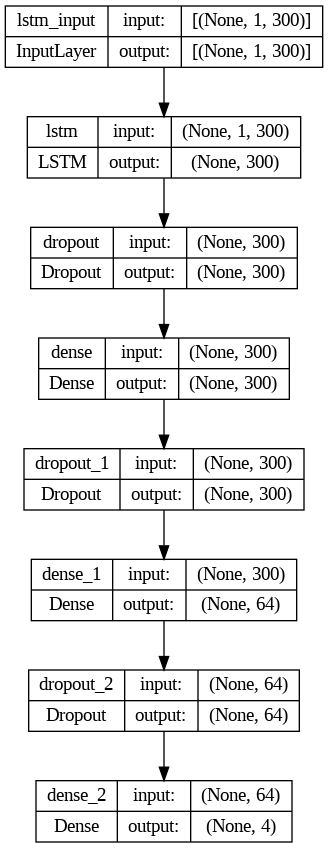

In [ ]:
from keras.utils import plot_model

plot_model(model, show_shapes=True)

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=30, batch_size=32, validation_split=0.2)

Epoch 1/30
25/25 [==============================] - 13s 42ms/step - loss: 105.3696 - accuracy: 0.3205 - val_loss: 68.8197 - val_accuracy: 0.4103
Epoch 2/30
25/25 [==============================] - 0s 9ms/step - loss: 48.4827 - accuracy: 0.4672 - val_loss: 30.4176 - val_accuracy: 0.4462
Epoch 3/30
25/25 [==============================] - 0s 10ms/step - loss: 21.1145 - accuracy: 0.5341 - val_loss: 13.0961 - val_accuracy: 0.5179
Epoch 4/30
25/25 [==============================] - 0s 11ms/step - loss: 9.1557 - accuracy: 0.5843 - val_loss: 5.8424 - val_accuracy: 0.5436
Epoch 5/30
25/25 [==============================] - 0s 12ms/step - loss: 4.2702 - accuracy: 0.5946 - val_loss: 2.9886 - val_accuracy: 0.5846
Epoch 6/30
25/25 [==============================] - 0s 9ms/step - loss: 2.3829 - accuracy: 0.6255 - val_loss: 1.9147 - val_accuracy: 0.6256
Epoch 7/30
25/25 [==============================] - 0s 7ms/step - loss: 1.6727 - accuracy: 0.6396 - val_loss: 1.5029 - val_accuracy: 0.6308
Epoch 8/

(0.0, 110.60825302898884)

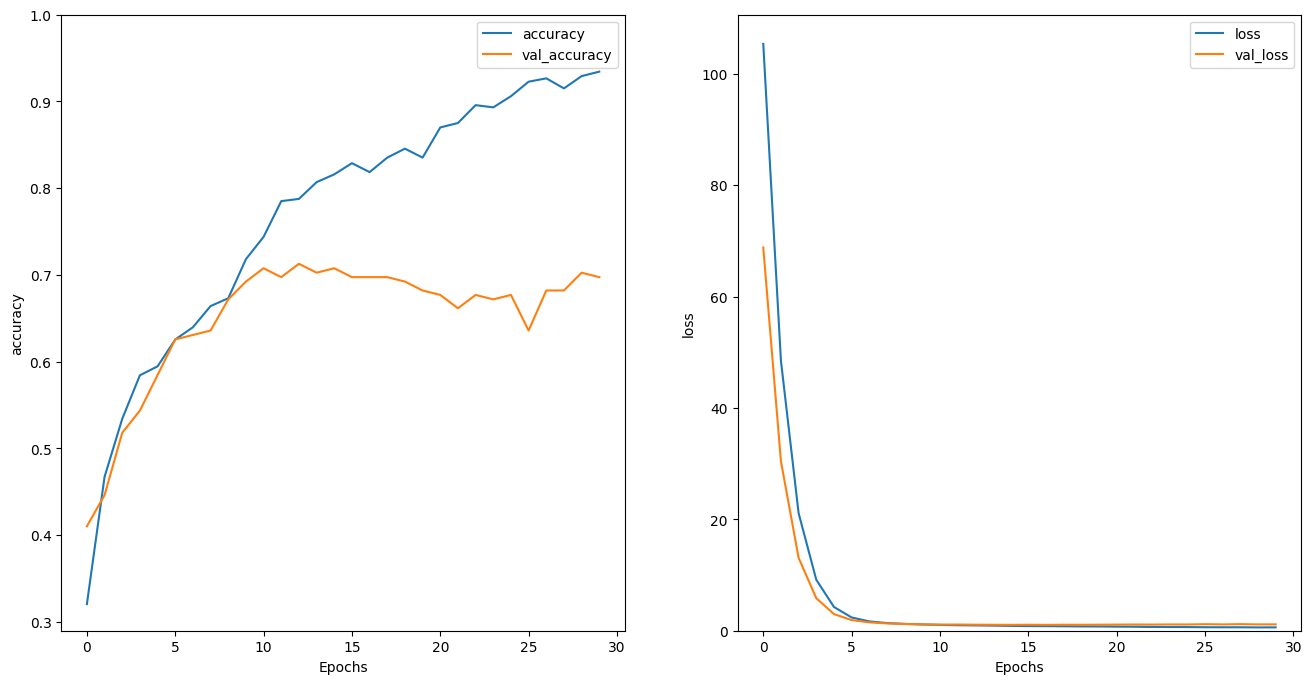

In [ ]:
import matplotlib.pyplot as plt

def plot_graphs(history, metric):
    plt.plot(history.history[metric])
    plt.plot(history.history['val_'+metric], '')
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.legend([metric, 'val_'+metric])

plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plot_graphs(history, 'accuracy')
plt.ylim(None, 1)
plt.subplot(1, 2, 2)
plot_graphs(history, 'loss')
plt.ylim(0, None)

8/8 [==============================] - 0s 3ms/step


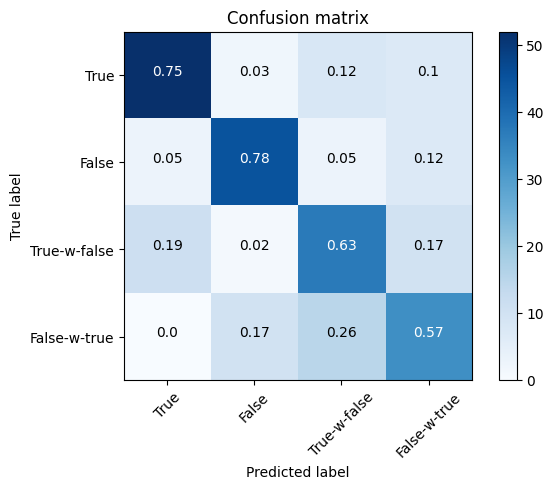

In [ ]:
from sklearn.metrics import confusion_matrix

y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)
cm = confusion_matrix(np.argmax(y_test, axis=1), y_pred)

plot_confusion_matrix(cm, class_names)

In [ ]:
test_loss, test_acc = model.evaluate(X_test, y_test)

print('Test Loss:', test_loss)
print('Test Accuracy:', test_acc)

8/8 [==============================] - 0s 5ms/step - loss: 1.2331 - accuracy: 0.6844
Test Loss: 1.233134388923645
Test Accuracy: 0.6844262480735779


In [ ]:
from sklearn.metrics import classification_report

# Predict on the train set
y_pred = model.predict(X_train)
y_pred = np.argmax(y_pred, axis=1)

# Evaluate the classifier
print(classification_report(np.argmax(y_train, axis=1), y_pred))

31/31 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.93      0.94      0.94       273
           1       0.94      0.95      0.94       230
           2       0.89      0.87      0.88       235
           3       0.91      0.91      0.91       234

    accuracy                           0.92       972
   macro avg       0.92      0.92      0.92       972
weighted avg       0.92      0.92      0.92       972



In [ ]:
from sklearn.metrics import classification_report

# Predict on the test set
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)

# Evaluate the classifier
print(classification_report(np.argmax(y_test, axis=1), y_pred))

8/8 [==============================] - 0s 3ms/step
              precision    recall  f1-score   support

           0       0.79      0.75      0.77        69
           1       0.78      0.78      0.78        58
           2       0.59      0.63      0.61        59
           3       0.58      0.57      0.57        58

    accuracy                           0.68       244
   macro avg       0.68      0.68      0.68       244
weighted avg       0.69      0.68      0.69       244



### GRU

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Dropout
from tensorflow.keras import regularizers

# defining the GRU model
model = Sequential(name='GRU')
model.add(GRU(300, input_shape=(1, vector_size)))
model.add(Dropout(0.3))
model.add(Dense(300, activation='relu', kernel_regularizer=regularizers.l2(0.3)))
model.add(Dropout(0.3))
model.add(Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.5)))
model.add(Dropout(0.3))
model.add(Dense(4, activation='softmax'))
model.summary()

Model: "GRU"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_1 (GRU)                 (None, 300)               541800    
                                                                 
 dropout_3 (Dropout)         (None, 300)               0         
                                                                 
 dense_3 (Dense)             (None, 300)               90300     
                                                                 
 dropout_4 (Dropout)         (None, 300)               0         
                                                                 
 dense_4 (Dense)             (None, 64)                19264     
                                                                 
 dropout_5 (Dropout)         (None, 64)                0         
                                                                 
 dense_5 (Dense)             (None, 4)                 260     

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=30, batch_size=32, validation_split=0.2)

Epoch 1/30
19/19 [==============================] - 12s 45ms/step - loss: 113.5805 - accuracy: 0.4467 - val_loss: 82.2272 - val_accuracy: 0.5068
Epoch 2/30
19/19 [==============================] - 0s 7ms/step - loss: 63.5024 - accuracy: 0.6220 - val_loss: 44.6945 - val_accuracy: 0.6575
Epoch 3/30
19/19 [==============================] - 0s 8ms/step - loss: 34.0385 - accuracy: 0.7027 - val_loss: 23.5625 - val_accuracy: 0.6644
Epoch 4/30
19/19 [==============================] - 0s 8ms/step - loss: 17.8103 - accuracy: 0.7577 - val_loss: 12.2519 - val_accuracy: 0.6712
Epoch 5/30
19/19 [==============================] - 0s 7ms/step - loss: 9.2571 - accuracy: 0.7990 - val_loss: 6.4263 - val_accuracy: 0.7329
Epoch 6/30
19/19 [==============================] - 0s 8ms/step - loss: 4.9035 - accuracy: 0.8127 - val_loss: 3.5115 - val_accuracy: 0.8014
Epoch 7/30
19/19 [==============================] - 0s 8ms/step - loss: 2.7417 - accuracy: 0.8213 - val_loss: 2.0968 - val_accuracy: 0.8082
Epoch 8/3

(0.0, 119.23296147882938)

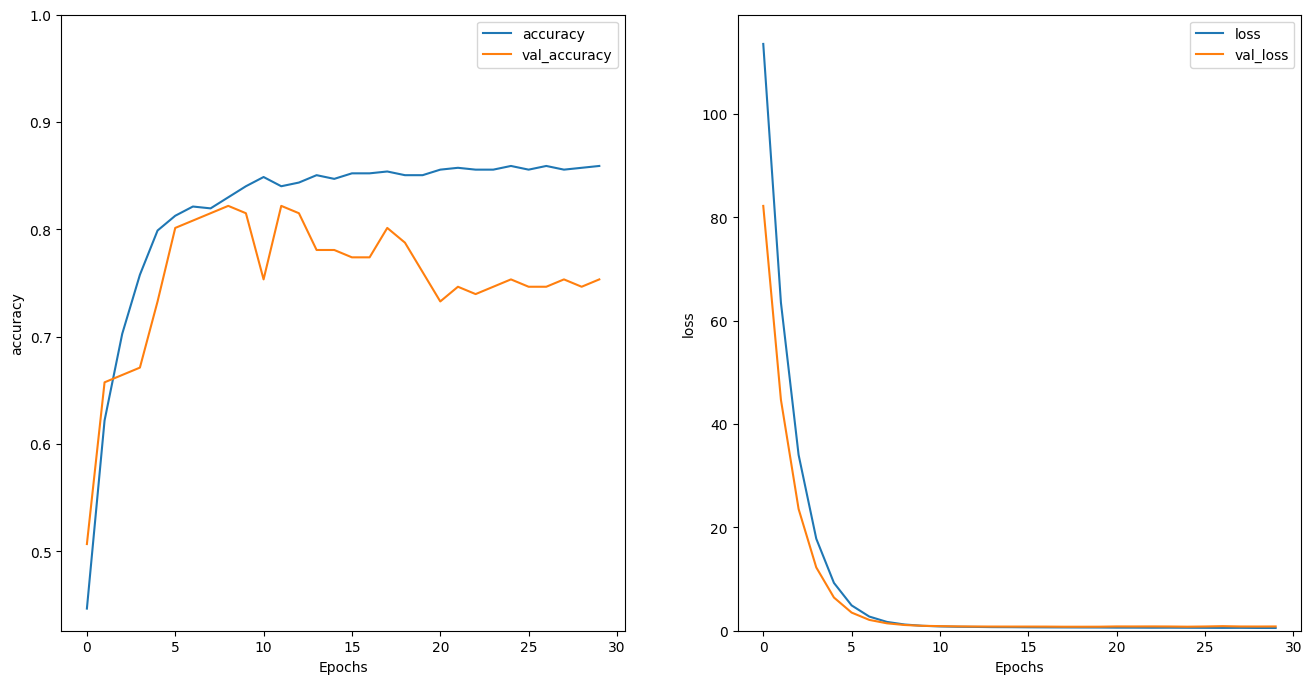

In [ ]:
import matplotlib.pyplot as plt

def plot_graphs(history, metric):
    plt.plot(history.history[metric])
    plt.plot(history.history['val_'+metric], '')
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.legend([metric, 'val_'+metric])

plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plot_graphs(history, 'accuracy')
plt.ylim(None, 1)
plt.subplot(1, 2, 2)
plot_graphs(history, 'loss')
plt.ylim(0, None)

In [ ]:
test_loss, test_acc = model.evaluate(X_test, y_test)

print('Test Loss:', test_loss)
print('Test Accuracy:', test_acc)

In [ ]:
from sklearn.metrics import classification_report

# Predict on the train set
y_pred = model.predict(X_train)
y_pred = np.argmax(y_pred, axis=1)

# Evaluate the classifier
print(classification_report(np.argmax(y_train, axis=1), y_pred))

In [ ]:
from sklearn.metrics import classification_report

# Predict on the test set
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)

# Evaluate the classifier
print(classification_report(np.argmax(y_test, axis=1), y_pred))

### Bi-LSTM

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Bidirectional, Dropout
from tensorflow.keras import regularizers

model = Sequential(name='Bidirectional_LSTM')
model.add(Bidirectional(LSTM(128), input_shape=(1, 300)))
model.add(Dropout(0.3))
model.add(Dense(128, activation='relu', kernel_regularizer=regularizers.l1_l2()))
model.add(Dropout(0.3))
model.add(Dense(4, activation='softmax'))
model.summary()

Model: "Bidirectional_LSTM"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_2 (Bidirecti  (None, 256)               439296    
 onal)                                                           
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense (Dense)               (None, 128)               32896     
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 4)                 516       
                                                                 
Total params: 472708 (1.80 MB)
Trainable params: 472708 (1.80 MB)
Non-trainable params: 0 (0.00 Byte)
____________

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Bidirectional

model = Sequential(name='Bidirectional_LSTM')
model.add(Bidirectional(LSTM(100), input_shape=(1, vector_size)))
model.add(Dropout(0.3))
model.add(Dense(100, activation='relu', kernel_regularizer=regularizers.l1_l2()))
model.add(Dropout(0.3))
model.add(Dense(4, activation='softmax'))
model.summary()

Model: "Bidirectional_LSTM"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_1 (Bidirecti  (None, 200)               320800    
 onal)                                                           
                                                                 
 dropout_5 (Dropout)         (None, 200)               0         
                                                                 
 dense_5 (Dense)             (None, 100)               20100     
                                                                 
 dropout_6 (Dropout)         (None, 100)               0         
                                                                 
 dense_6 (Dense)             (None, 4)                 404       
                                                                 
Total params: 341304 (1.30 MB)
Trainable params: 341304 (1.30 MB)
Non-trainable params: 0 (0.00 Byte)
____________

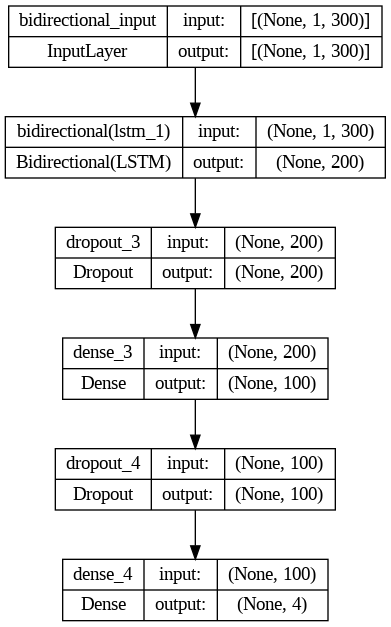

In [ ]:
from keras.utils import plot_model

plot_model(model, show_shapes=True)

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

Epoch 1/50
25/25 [==============================] - 7s 38ms/step - loss: 14.4584 - accuracy: 0.3372 - val_loss: 11.8201 - val_accuracy: 0.4769
Epoch 2/50
25/25 [==============================] - 0s 8ms/step - loss: 9.8389 - accuracy: 0.5264 - val_loss: 7.8048 - val_accuracy: 0.5744
Epoch 3/50
25/25 [==============================] - 0s 7ms/step - loss: 6.2913 - accuracy: 0.7027 - val_loss: 4.8362 - val_accuracy: 0.6718
Epoch 4/50
25/25 [==============================] - 0s 8ms/step - loss: 3.7597 - accuracy: 0.7349 - val_loss: 2.8377 - val_accuracy: 0.7436
Epoch 5/50
25/25 [==============================] - 0s 8ms/step - loss: 2.1690 - accuracy: 0.7542 - val_loss: 1.7175 - val_accuracy: 0.7538
Epoch 6/50
25/25 [==============================] - 0s 8ms/step - loss: 1.3750 - accuracy: 0.7941 - val_loss: 1.3055 - val_accuracy: 0.7385
Epoch 7/50
25/25 [==============================] - 0s 9ms/step - loss: 1.1233 - accuracy: 0.7812 - val_loss: 1.1909 - val_accuracy: 0.7333
Epoch 8/50
25/25 

(0.0, 15.166586714982987)

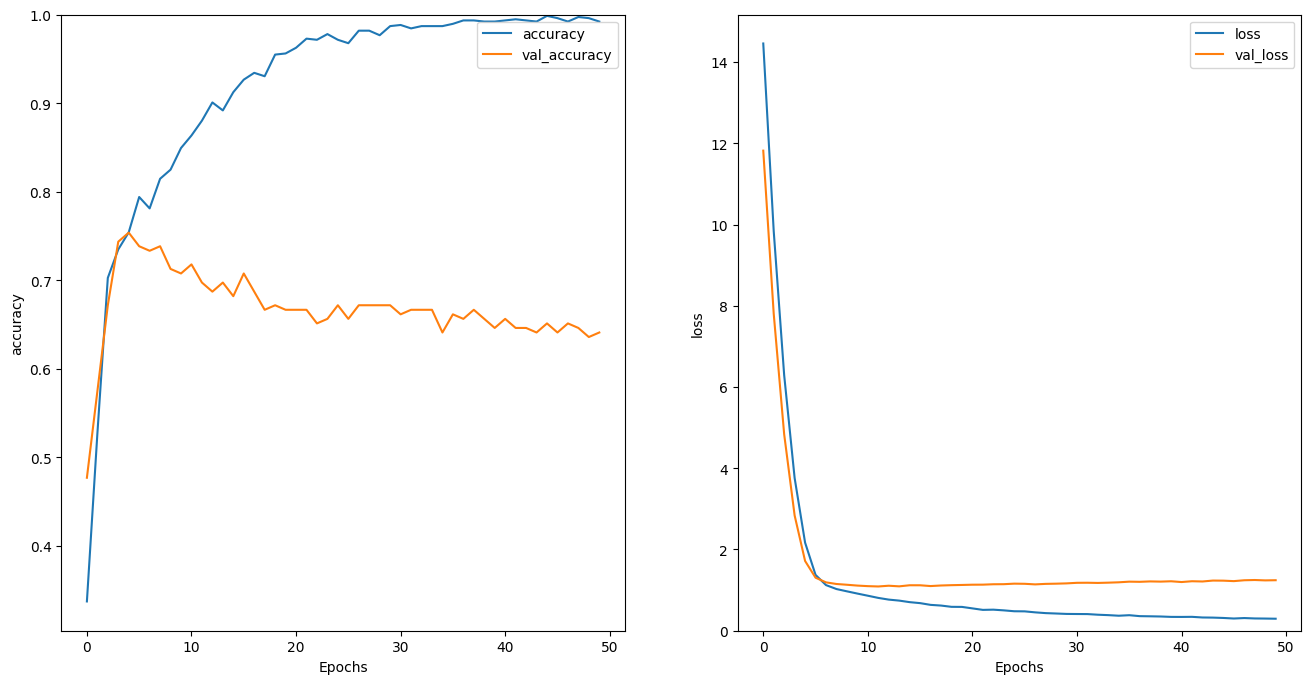

In [ ]:
import matplotlib.pyplot as plt

def plot_graphs(history, metric):
    plt.plot(history.history[metric])
    plt.plot(history.history['val_'+metric], '')
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.legend([metric, 'val_'+metric])

plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plot_graphs(history, 'accuracy')
plt.ylim(None, 1)
plt.subplot(1, 2, 2)
plot_graphs(history, 'loss')
plt.ylim(0, None)

In [ ]:
test_loss, test_acc = model.evaluate(X_test, y_test)

print('Test Loss:', test_loss)
print('Test Accuracy:', test_acc)

8/8 [==============================] - 0s 4ms/step - loss: 1.3921 - accuracy: 0.6639
Test Loss: 1.3920611143112183
Test Accuracy: 0.6639344096183777


In [ ]:
from sklearn.metrics import classification_report

# Predict on the train set
y_pred = model.predict(X_train)
y_pred = np.argmax(y_pred, axis=1)

# Evaluate the classifier
print(classification_report(np.argmax(y_train, axis=1), y_pred))

31/31 [==============================] - 1s 3ms/step
              precision    recall  f1-score   support

           0       0.94      0.94      0.94       273
           1       0.95      0.95      0.95       230
           2       0.91      0.89      0.90       235
           3       0.92      0.93      0.92       234

    accuracy                           0.93       972
   macro avg       0.93      0.93      0.93       972
weighted avg       0.93      0.93      0.93       972



In [ ]:
from sklearn.metrics import classification_report

# Predict on the test set
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)

# Evaluate the classifier
print(classification_report(np.argmax(y_test, axis=1), y_pred))

8/8 [==============================] - 0s 3ms/step
              precision    recall  f1-score   support

           0       0.68      0.78      0.73        69
           1       0.81      0.81      0.81        58
           2       0.60      0.47      0.53        59
           3       0.55      0.57      0.56        58

    accuracy                           0.66       244
   macro avg       0.66      0.66      0.66       244
weighted avg       0.66      0.66      0.66       244



## Save to drive

In [ ]:
from google.colab import drive
drive.mount("/content/MyDrive")

Mounted at /content/MyDrive


In [ ]:
# Lưu model
model.save('/content/MyDrive/MyDrive/Colab Notebooks/Fake news detection/model/bi_lstm_doc2vec_4_class.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
